In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [6]:
sales = pd.read_csv('processed_data_for_ML.csv', encoding='latin-1')
sales.shape

(51290, 15)

In [7]:
from sklearn.model_selection import train_test_split

X = sales.drop('Total_sales', axis=1)
y = sales['Total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=30),
    "Extra Trees": ExtraTreesRegressor(random_state=30),
    "Gradient Boosting": GradientBoostingRegressor(random_state=30),
    "XGBoost": XGBRegressor(random_state=30, verbosity=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)

    # Calculate metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_test = mean_absolute_error(y_test, preds_test)
    mae_train = mean_absolute_error(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)

    print(f"{name}:")
    print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
    print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
    print(f"  Train R²:   {r2_train:.4f}   | Test R²:   {r2_test:.4f}")
    print("-" * 50)

Linear Regression:
  Train RMSE: 289.9969 | Test RMSE: 288.3436
  Train MAE:  191.8220 | Test MAE:  189.5640
  Train R²:   0.6942   | Test R²:   0.6936
--------------------------------------------------
K-Nearest Neighbors:
  Train RMSE: 221.9910 | Test RMSE: 270.5173
  Train MAE:  129.7680 | Test MAE:  157.6022
  Train R²:   0.8208   | Test R²:   0.7303
--------------------------------------------------
Random Forest:
  Train RMSE: 64.5844 | Test RMSE: 176.4978
  Train MAE:  34.6456 | Test MAE:  94.3040
  Train R²:   0.9848   | Test R²:   0.8852
--------------------------------------------------
Extra Trees:
  Train RMSE: 0.0009 | Test RMSE: 176.0009
  Train MAE:  0.0000 | Test MAE:  94.3121
  Train R²:   1.0000   | Test R²:   0.8858
--------------------------------------------------
Gradient Boosting:
  Train RMSE: 189.8805 | Test RMSE: 194.5291
  Train MAE:  111.2296 | Test MAE:  112.2681
  Train R²:   0.8689   | Test R²:   0.8605
--------------------------------------------------
X

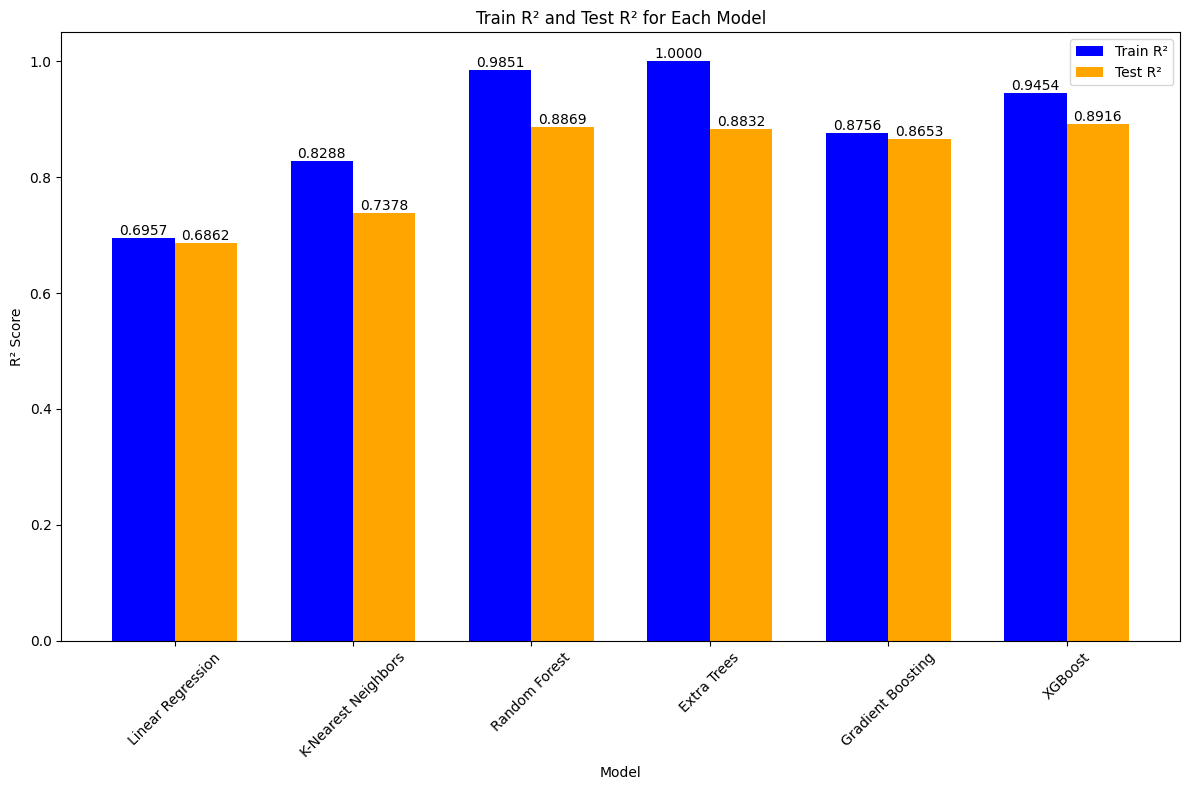

In [16]:
import matplotlib.pyplot as plt

r2_scores = {
    'Model': ['Linear Regression', 'K-Nearest Neighbors', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'XGBoost'],
    'Train R²': [0.6957, 0.8288, 0.9851, 1.0000, 0.8756, 0.9454],
    'Test R²': [0.6862, 0.7378, 0.8869, 0.8832, 0.8653, 0.8916]
}

r2_df = pd.DataFrame(r2_scores)

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(r2_df['Model']))

train_bars = plt.bar(index, r2_df['Train R²'], bar_width, label='Train R²', color='blue')
test_bars = plt.bar([i + bar_width for i in index], r2_df['Test R²'], bar_width, label='Test R²', color='orange')

for bar in train_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

for bar in test_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Train R² and Test R² for Each Model')
plt.xticks([i + bar_width / 2 for i in index], r2_df['Model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

we choose XGboost beacause it has the best performance on test and train data 

**# making hyperparameters tuning (using Grid search) to got the best params for XGboost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

grid_search = GridSearchCV(
    estimator=xgbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")
print(f"Tuned XGBoost MAE: {mae:.2f}")
print(f"Tuned XGBoost R²: {r2:.4f}")

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}
Tuned XGBoost RMSE: 164.45
Tuned XGBoost MAE: 89.19
Tuned XGBoost R²: 0.9003


**# After making hyperparameters this the best parameters for XGBoost Model**

In [ ]:

import xgboost as xgb
models = {
     
    "XGBoost": xgb.XGBRegressor(colsample_bytree= 1.0, gamma= 0, learning_rate= 0.05, max_depth= 7, n_estimators= 300, reg_alpha= 1, reg_lambda= 1.5, subsample= 0.8)
    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_test = mean_absolute_error(y_test, preds_test)
    mae_train = mean_absolute_error(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)

    print(f"{name}:")
    print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
    print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
    print(f"  Train R²:   {r2_train:.4f}   | Test R²:   {r2_test:.4f}")
    print("-" * 50)

XGBoost:
  Train RMSE: 124.1010 | Test RMSE: 164.4443
  Train MAE:  69.5143 | Test MAE:  89.1330
  Train R²:   0.9440   | Test R²:   0.9003
--------------------------------------------------


In [ ]:
# using mlflow for tracking the best parameters and metrics for the model
import xgboost as xgb
models = {
      
    "XGBoost": xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 0, learning_rate= 0.05, max_depth= 5, n_estimators= 300, reg_alpha= 1, reg_lambda= 2, subsample= 0.8)
    
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    preds_train = model.predict(X_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_test = mean_absolute_error(y_test, preds_test)
    mae_train = mean_absolute_error(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    r2_train = r2_score(y_train, preds_train)

    print(f"{name}:")
    print(f"  Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
    print(f"  Train MAE:  {mae_train:.4f} | Test MAE:  {mae_test:.4f}")
    print(f"  Train R²:   {r2_train:.4f}   | Test R²:   {r2_test:.4f}")
    print("-" * 50)

XGBoost:
  Train RMSE: 157.0398 | Test RMSE: 171.5072
  Train MAE:  88.3543 | Test MAE:  94.5638
  Train R²:   0.9103   | Test R²:   0.8916
--------------------------------------------------


In [12]:
import pickle
best_model = models["XGBoost"]

with open("xgboost_sales_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as 'xgboost_sales_model.pkl'")


Model saved as 'xgboost_sales_model.pkl'


In [13]:
with open("xgboost_sales_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Loaded Model RMSE: {rmse:.2f}")
print(f"Loaded Model MAE: {mae:.2f}")
print(f"Loaded Model R²: {r2:.4f}")

Loaded Model RMSE: 171.51
Loaded Model MAE: 94.56
Loaded Model R²: 0.8916


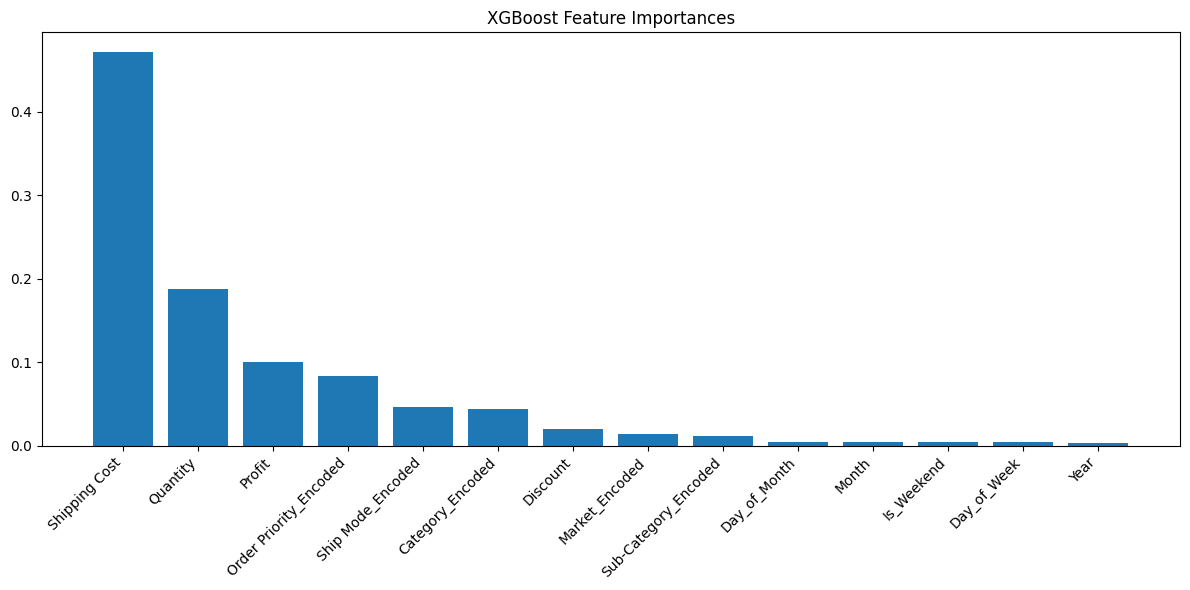

In [14]:
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(fi_df['Feature'], fi_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()
